# Data loading

In [2]:
# a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# b
income_df=pd.read_csv('DS1_C9_S1_Practice_Income_Data.csv')
income_df

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


# Task-1-Data Exploration

In [5]:
# a

In [6]:

income_df.shape

(32561, 13)

In [7]:
income_df.describe()

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [8]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [9]:
income_df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [10]:
# b

In [11]:
# copy of another data frame
income_df_c=income_df
income_df_c

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [12]:
income_df_c['WorkClass'].value_counts()

WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
income_df_c['Education'].value_counts()

Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [14]:
income_df_c['Marital_Status'].value_counts()

Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [15]:
income_df_c['Occupation'].value_counts()

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [16]:
income_df_c['Relationship'].value_counts()

Relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [17]:
income_df_c['Gender'].value_counts()

Gender
Male      21790
Female    10771
Name: count, dtype: int64

In [18]:
income_df_c['Native_Country'].value_counts()

Native_Country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [19]:
income_df_c['Income_Bracket'].value_counts()

Income_Bracket
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [20]:
categorical_columns=income_df_c.select_dtypes(include='object')
categorical_columns

,WorkClass,Education,Marital_Status,Occupation,Relationship,Gender,Native_Country,Income_Bracket
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


In [21]:
def fun_values(col):
    print(income_df_c[col].value_counts())

In [22]:
for i in categorical_columns:
    fun_values(i)
    print('-----------------')
    

WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-----------------
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
-----------------
Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
-----------------
Occupation
Prof-specialty     

# Task-2-Missing value-Treatment


In [24]:
# a and b

In [25]:

income_df_c.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [26]:
income_df_c['WorkClass'].value_counts()

WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
income_df_c['WorkClass'].mode()[0]

' Private'

In [28]:
income_df_c['WorkClass']=income_df_c['WorkClass'].replace(' ?',' Private')
income_df_c['WorkClass'].value_counts()

WorkClass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [29]:
income_df_c['Occupation'].value_counts()

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [30]:
income_df_c['Occupation'].mode()[0]

' Prof-specialty'

In [31]:
income_df_c['Occupation']=income_df_c['Occupation'].replace(' ?',' Prof-specialty')
income_df_c['Occupation'].value_counts()

Occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [32]:
income_df_c['Native_Country'].value_counts()

Native_Country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [33]:
income_df_c['Native_Country'].mode()[0]

' United-States'

In [34]:
income_df_c['Native_Country']=income_df_c['Native_Country'].replace(' ?',' United-States')
income_df_c['Native_Country'].value_counts()

Native_Country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

# Task-3-Data-Preprocessing

In [36]:
# a

In [37]:
income_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [38]:
income_df_c['WorkClass']=income_df_c['WorkClass'].astype('category')


In [39]:
income_df_c['Education']=income_df_c['Education'].astype('category')


In [40]:
income_df_c['Marital_Status']=income_df_c['Marital_Status'].astype('category')


In [41]:
income_df_c['Occupation']=income_df_c['Occupation'].astype('category')


In [42]:
income_df_c['Relationship']=income_df_c['Relationship'].astype('category')


In [43]:
income_df_c['Gender']=income_df_c['Gender'].astype('category')


In [44]:
income_df_c['Native_Country']=income_df_c['Native_Country'].astype('category')


In [45]:
income_df_c['Income_Bracket']=income_df_c['Income_Bracket'].astype('category')


In [46]:
income_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   WorkClass       32561 non-null  category
 2   Fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Marital_Status  32561 non-null  category
 5   Occupation      32561 non-null  category
 6   Relationship    32561 non-null  category
 7   Gender          32561 non-null  category
 8   Capital_Gain    32561 non-null  int64   
 9   Capital_Loss    32561 non-null  int64   
 10  Hours_Per_Week  32561 non-null  int64   
 11  Native_Country  32561 non-null  category
 12  Income_Bracket  32561 non-null  category
dtypes: category(8), int64(5)
memory usage: 1.5 MB


In [47]:
# b

In [48]:
label_encoder=preprocessing.LabelEncoder()

In [49]:
income_df_c['WorkClass_encode']=label_encoder.fit_transform(income_df_c['WorkClass'])


In [50]:
income_df_c['Education_encode']=label_encoder.fit_transform(income_df_c['Education'])


In [51]:
income_df_c['Marital_Status_encode']=label_encoder.fit_transform(income_df_c['Marital_Status'])


In [52]:
income_df_c['Occupation_encode']=label_encoder.fit_transform(income_df_c['Occupation'])


In [53]:
income_df_c['Relationship_encode']=label_encoder.fit_transform(income_df_c['Relationship'])


In [54]:
income_df_c['Gender_encode']=label_encoder.fit_transform(income_df_c['Gender'])


In [55]:
income_df_c['Native_Country_encode']=label_encoder.fit_transform(income_df_c['Native_Country'])


In [56]:
income_df_c['Income_Bracket_encode']=label_encoder.fit_transform(income_df_c['Income_Bracket'])


In [57]:
income_df_c.head()

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,6,9,4,0,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,5,9,2,3,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,0,5,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,3,1,2,5,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,3,9,2,9,5,0,4,0


In [58]:
income_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    32561 non-null  int64   
 1   WorkClass              32561 non-null  category
 2   Fnlwgt                 32561 non-null  int64   
 3   Education              32561 non-null  category
 4   Marital_Status         32561 non-null  category
 5   Occupation             32561 non-null  category
 6   Relationship           32561 non-null  category
 7   Gender                 32561 non-null  category
 8   Capital_Gain           32561 non-null  int64   
 9   Capital_Loss           32561 non-null  int64   
 10  Hours_Per_Week         32561 non-null  int64   
 11  Native_Country         32561 non-null  category
 12  Income_Bracket         32561 non-null  category
 13  WorkClass_encode       32561 non-null  int32   
 14  Education_encode       32561 non-null 

In [59]:
# c


In [60]:
def feature_scale(scale):
    numerics=['int64','int32']
    numerical_df=income_df_c.select_dtypes(include=numerics)
    if scale=='MinMax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    scaled_df=pd.DataFrame(scaler.fit_transform(numerical_df.to_numpy()),columns=numerical_df.columns)
    return scaled_df

In [61]:
scale='MinMax'
scaled=feature_scale(scale)
scaled

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,0.301370,0.044302,0.021740,0.0,0.397959,0.857143,0.600000,0.666667,0.000000,0.2,1.0,0.95,0.0
1,0.452055,0.048238,0.000000,0.0,0.122449,0.714286,0.600000,0.333333,0.230769,0.0,1.0,0.95,0.0
2,0.287671,0.138113,0.000000,0.0,0.397959,0.428571,0.733333,0.000000,0.384615,0.2,1.0,0.95,0.0
3,0.493151,0.151068,0.000000,0.0,0.397959,0.428571,0.066667,0.333333,0.384615,0.0,1.0,0.95,0.0
4,0.150685,0.221488,0.000000,0.0,0.397959,0.428571,0.600000,0.333333,0.692308,1.0,0.0,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.000000,0.0,0.377551,0.428571,0.466667,0.333333,0.923077,1.0,0.0,0.95,0.0
32557,0.315068,0.096500,0.000000,0.0,0.397959,0.428571,0.733333,0.333333,0.461538,0.0,1.0,0.95,1.0
32558,0.561644,0.094827,0.000000,0.0,0.397959,0.428571,0.733333,1.000000,0.000000,0.8,0.0,0.95,0.0
32559,0.068493,0.128499,0.000000,0.0,0.193878,0.428571,0.733333,0.666667,0.000000,0.6,1.0,0.95,0.0


In [62]:
corr=scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
Age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.040504,-0.010508,-0.266288,0.001739,-0.263698,0.088832,-0.000270,0.234037
Fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.024338,-0.028145,0.028153,0.000188,0.008931,0.026858,-0.063286,-0.009463
Capital_Gain,0.077674,0.000432,1.000000,-0.031615,0.078409,0.031505,0.030046,-0.043393,0.018021,-0.057919,0.048480,0.008819,0.223329
Capital_Loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,0.002644,0.016746,-0.034187,0.009680,-0.061062,0.045567,0.009401,0.150526
Hours_Per_Week,0.068756,-0.018768,0.078409,0.054256,1.000000,0.042199,0.055510,-0.190519,-0.012879,-0.248974,0.229309,0.006592,0.229689
WorkClass_encode,0.040504,-0.024338,0.031505,0.002644,0.042199,1.000000,0.004874,-0.020468,0.007110,-0.057947,0.071584,-0.001625,0.002693
Education_encode,-0.010508,-0.028145,0.030046,0.016746,0.055510,0.004874,1.000000,-0.038407,-0.041279,-0.010876,-0.027356,0.076060,0.079317
Marital_Status_encode,-0.266288,0.028153,-0.043393,-0.034187,-0.190519,-0.020468,-0.038407,1.000000,0.034962,0.185451,-0.129314,-0.021278,-0.199307
Occupation_encode,0.001739,0.000188,0.018021,0.009680,-0.012879,0.007110,-0.041279,0.034962,1.000000,-0.037451,0.047461,-0.002217,0.034625
Relationship_encode,-0.263698,0.008931,-0.057919,-0.061062,-0.248974,-0.057947,-0.010876,0.185451,-0.037451,1.000000,-0.582454,-0.010712,-0.250918


<Axes: >

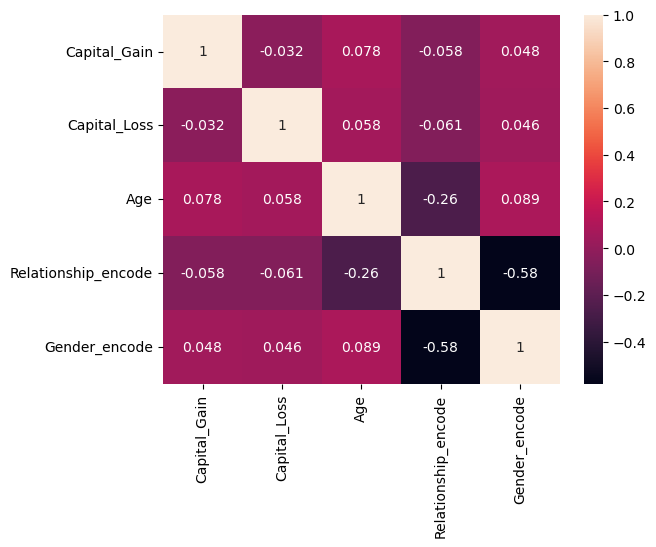

In [63]:
best_col=scaled[['Capital_Gain','Capital_Loss','Age','Relationship_encode','Gender_encode']]
sns.heatmap(best_col.corr(),annot=True)

In [64]:
income_df_c

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,6,9,4,0,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,5,9,2,3,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,0,5,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,3,1,2,5,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,3,9,2,9,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,...,United-States,<=50K,3,7,2,12,5,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,...,United-States,>50K,3,11,2,6,0,1,38,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,...,United-States,<=50K,3,11,6,0,4,0,38,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,...,United-States,<=50K,3,11,4,0,3,1,38,0


# task4

In [65]:
train=int(32561 *0.7)
train

22792

In [66]:
train_data=income_df_c.iloc[:train,:]
train_data

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,6,9,4,0,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,5,9,2,3,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,0,5,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,3,1,2,5,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,3,9,2,9,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,55,Federal-gov,31965,Some-college,Married-civ-spouse,Adm-clerical,Husband,Male,0,0,...,United-States,<=50K,0,15,2,0,0,1,38,0
22788,21,Private,143604,Some-college,Never-married,Other-service,Own-child,Female,0,0,...,United-States,<=50K,3,15,4,7,3,0,38,0
22789,35,Private,174308,Some-college,Never-married,Transport-moving,Own-child,Male,0,0,...,United-States,<=50K,3,15,4,13,3,1,38,0
22790,31,Self-emp-not-inc,162551,12th,Married-civ-spouse,Sales,Wife,Female,0,0,...,United-States,<=50K,5,2,2,11,5,0,38,0


In [67]:
test_data=income_df_c.iloc[train:,:]
test_data

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
22792,30,Private,75167,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,3,9,2,3,0,1,38,0
22793,39,Private,176296,HS-grad,Married-civ-spouse,Transport-moving,Husband,Male,0,1887,...,United-States,>50K,3,11,2,13,0,1,38,1
22794,19,Private,93518,Some-college,Never-married,Sales,Own-child,Female,0,0,...,United-States,<=50K,3,15,4,11,3,0,38,0
22795,25,Private,126797,HS-grad,Married-spouse-absent,Prof-specialty,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,3,9,1,1,38,0
22796,57,Self-emp-not-inc,25124,HS-grad,Married-civ-spouse,Other-service,Husband,Male,0,0,...,United-States,<=50K,5,11,2,7,0,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,...,United-States,<=50K,3,7,2,12,5,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,...,United-States,>50K,3,11,2,6,0,1,38,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,...,United-States,<=50K,3,11,6,0,4,0,38,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,...,United-States,<=50K,3,11,4,0,3,1,38,0


In [68]:
print("shape of the train_data {} and shape of the test_data {}".format(train_data.shape,test_data.shape))

shape of the train_data (22792, 21) and shape of the test_data (9769, 21)


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
y=income_df_c['Age']
x=income_df_c

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [71]:
print("shape of the train_data {} and shape of the test_data {}".format(X_train.shape,X_test.shape))

shape of the train_data (22792, 21) and shape of the test_data (9769, 21)


In [72]:
print("shape of the train_data {} and shape of the test_data {}".format(y_train.shape,y_test.shape))

shape of the train_data (22792,) and shape of the test_data (9769,)


# task5

In [74]:
income_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    32561 non-null  int64   
 1   WorkClass              32561 non-null  category
 2   Fnlwgt                 32561 non-null  int64   
 3   Education              32561 non-null  category
 4   Marital_Status         32561 non-null  category
 5   Occupation             32561 non-null  category
 6   Relationship           32561 non-null  category
 7   Gender                 32561 non-null  category
 8   Capital_Gain           32561 non-null  int64   
 9   Capital_Loss           32561 non-null  int64   
 10  Hours_Per_Week         32561 non-null  int64   
 11  Native_Country         32561 non-null  category
 12  Income_Bracket         32561 non-null  category
 13  WorkClass_encode       32561 non-null  int32   
 14  Education_encode       32561 non-null 

In [75]:
num_col=8
numerical_col=income_df_c.select_dtypes(include='category')
col_name=numerical_col.columns
num_row=int(len(col_name)/num_col)


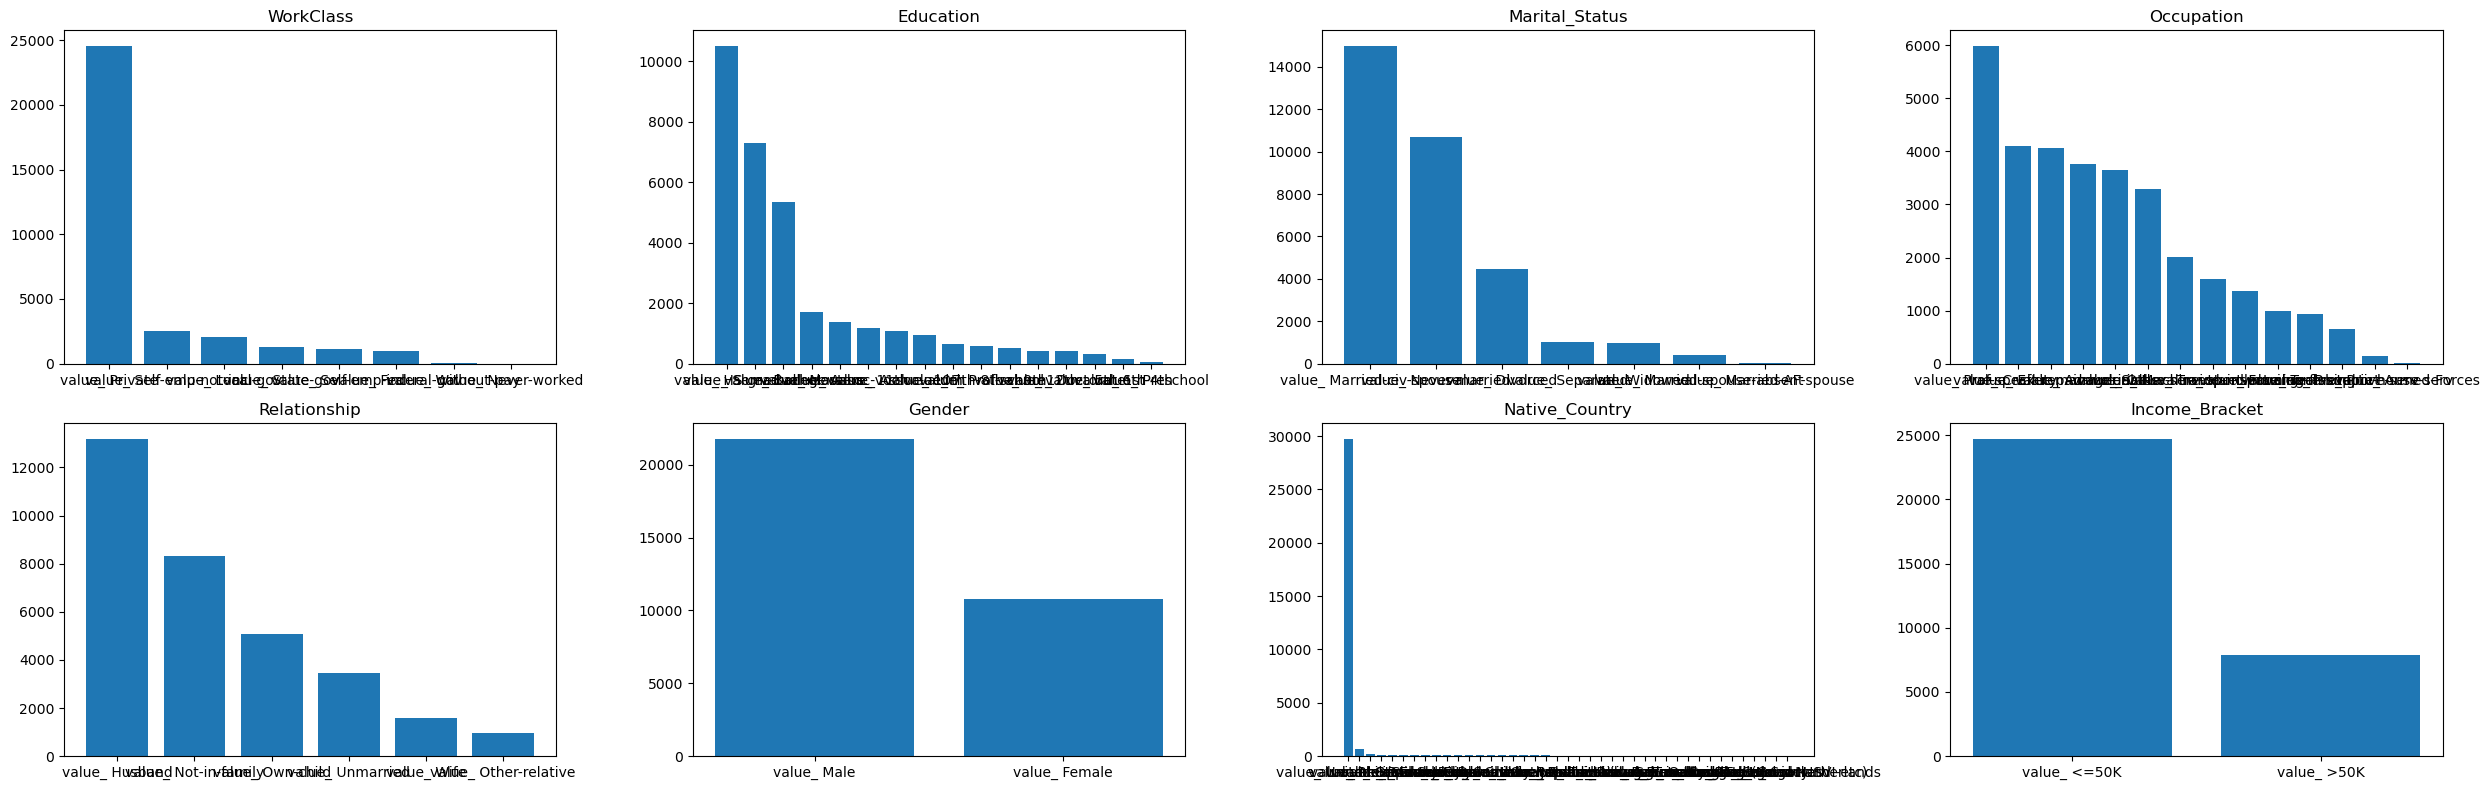

In [76]:
fig,axs=plt.subplots(2,4,tight_layout=True,figsize=(25,8))
for col,ax in zip(col_name,axs.flatten()[:len(col_name)]):
    stats=income_df_c[col].value_counts()
    value=list(stats)
    name=list(map(lambda x:''.join(('value_',str(x))),list(stats.index)))
    ax.bar(name,value)
    ax.set_title(col)
    

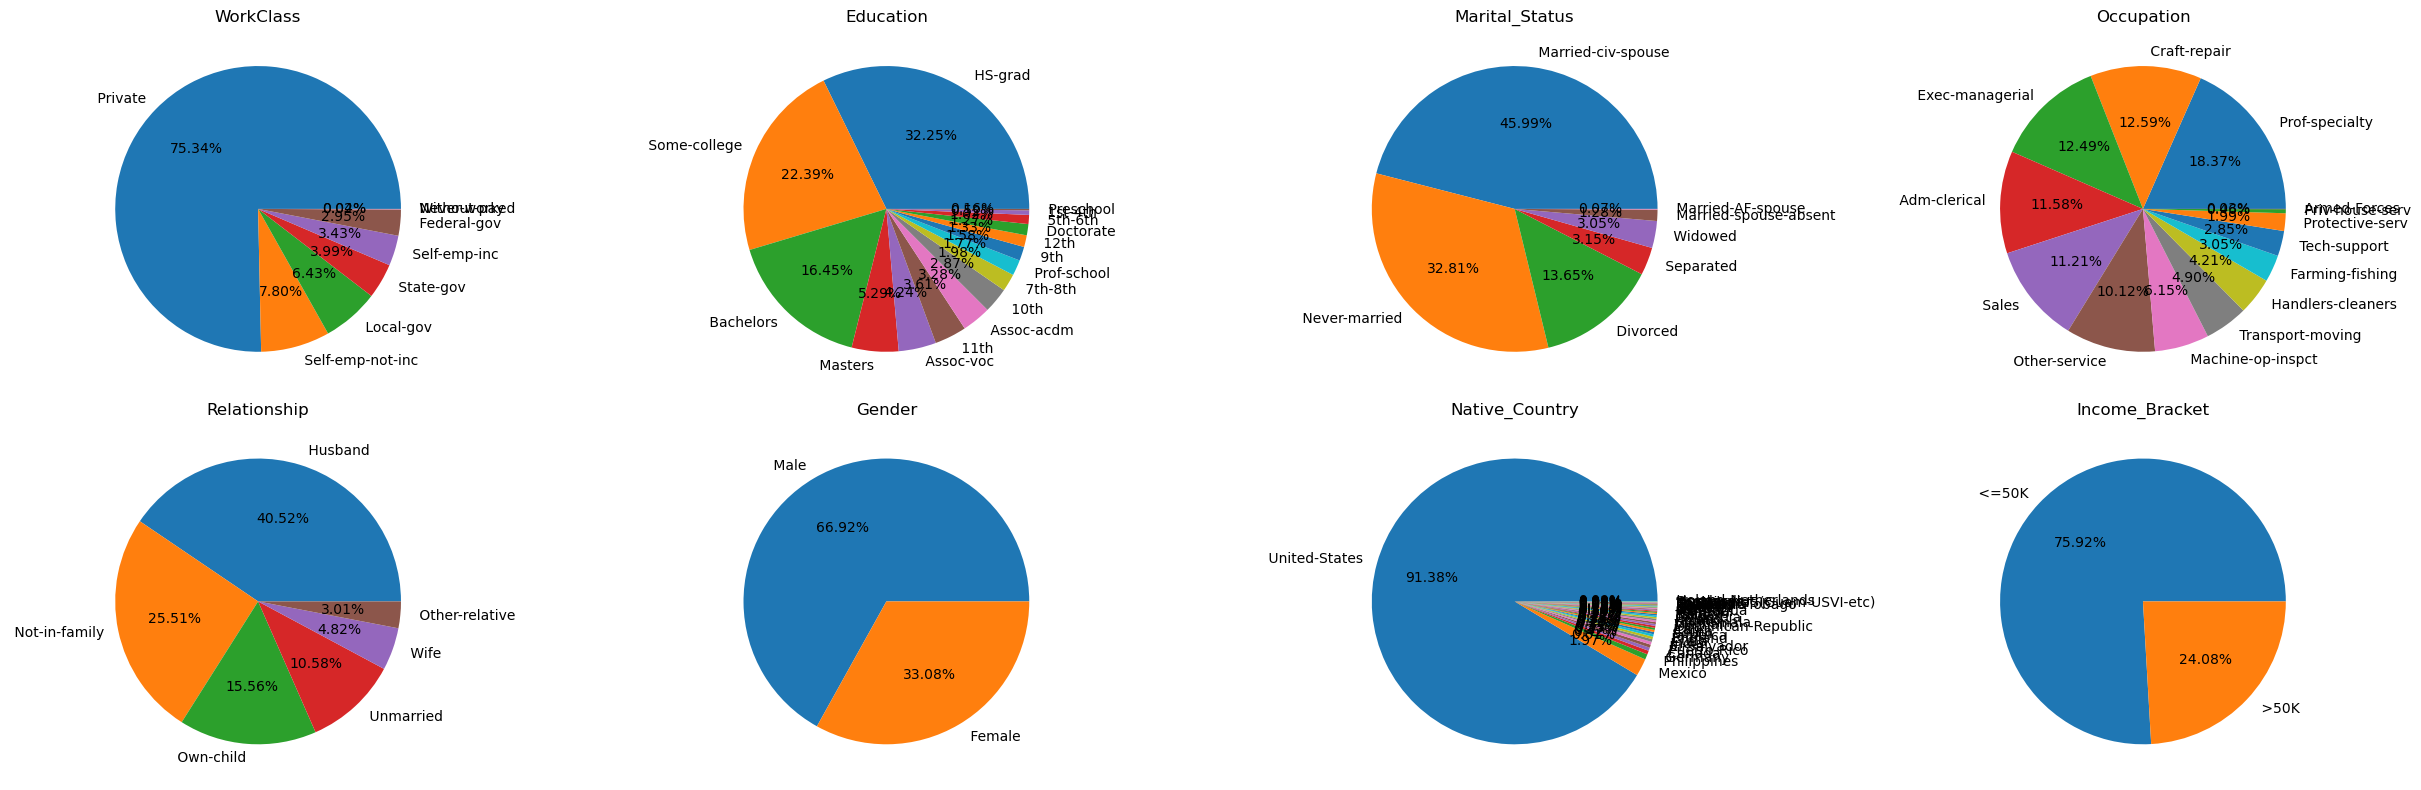

In [152]:
fig,axs=plt.subplots(2,4,tight_layout=True,figsize=(25,8))
for col,ax in zip(col_name,axs.flatten()[:len(col_name)]):
    stats=income_df_c[col].value_counts()
    value=list(stats)
    # name=list(map(lambda x:''.join(('value_',str(x))),list(stats.index)))
    ax.pie(stats,labels=stats.index,autopct="%.2f%%")
    ax.set_title(col)